#### DSC630-T302 
#### Chitramoy Mukherjee
####  Week-1 Assignment
#### Analyze Mental health disorder in Tech Companies
#### Date: 3/12/2024

Introduction:
---------------

In recent years, the tech industry has experienced rapid growth and innovation, bringing about numerous opportunities and challenges. While technological advancements have transformed the way we work, they have also introduced new stressors that can impact the mental health of individuals working in this sector. Recognizing the importance of mental health in the workplace, this project aims to analyze mental health disorders within tech companies using Python.Mental health affects your emotional, psychological and social well-being.Mental health is a key factor todetermine the productivity of the employee in any industry and as a whole total performance of the company. If someone is not mentally fit, he can’t produce the expected output what he is capable of and it also impacts his co-workers performance and impacts the work environment.

Objective:
-------------

The primary objective of this assignment is to gain insights into the prevalence of mental health disorders among employees in the tech industry. By leveraging Python for data analysis, we aim to explore patterns, trends, and potential factors contributing to mental health issues. The analysis will be based on a dataset collected from surveys conducted within tech companies, covering a range of variables related to mental health. This sort of analysis helps the employer to identify and support an individual who may be experiencing a mental health or substance use concern or crisis and connect them with the appropriate employee resources.
This allows employer to recognize the signs of someone who maybe struggling and teaches them the skills to know when to reach out and what resources are available.Organizations that incorporate mental health awareness help to create a healthy and
productive work environment that reduces the stigma associated with mental illness, increases the organizations mental health literacy and teaches the skills to safely and responsibly respond to a co-workers mental health concern.
   
Key questions questions to explore visually with survey.csv data:
---------------------------------------------------------
Below are the questions we will explore visually using the survey.csv data :

1. How easy is it for the employee to take medical leave for a mental health condition?
2. Does the employee sought treatment for a mental health condition?
3. Does family history of mental illness influences  employees current mental health?
4. Does the mental health condition interferes respondants work?
5. How the remote work impacts the mental health?
6. Does your employer provide mental health benefits?
7. willingness of the employee to discuss a mental health issue with coworkers?

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score




from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

### Reading the labeledTrainData.tsv file into DataFrame
df = pd.read_csv("C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-630\Week-1\\survey.csv")

# Display the first few rows of the DataFrame to ensure it's loaded properly
print(df)

df.columns

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [2]:
# Visualize the data and identify the non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Defination of each field in the dataset.

1. Timestamp : Time of data entry in YYYY-MM-DD HH:MM:SS format.
2. Age : Age of the respondant.
3. Gender : Gender of the respondant.
4. Country : Country of the respondant.
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed?
7. family_history: Do you have a family history of mental illness?
8. treatment: Have you sought treatment for a mental health condition?
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
10. no_employees: How many employees does your company or organization have?
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits?
14. care_options: Do you know the options for mental health care your employer provides?
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. leave: How easy is it for you to take medical leave for a mental health condition?
19. mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
22. physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
23. mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
24. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
25. comments: Any additional notes or comments

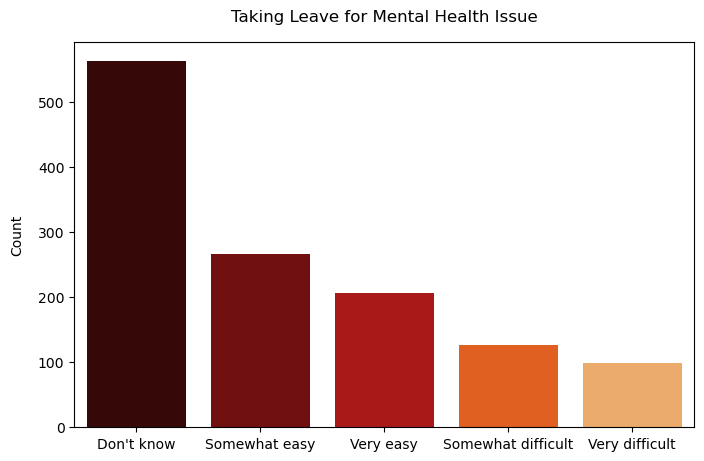

In [3]:
# Bar diagram plot of how ease to take leave due to mental health issue

df['leave'].value_counts().index
plt.figure(figsize=(8,5)) # Size of the figure

# Using value_counts(), we get the count of each answer in descending order, we then use .index to get an Index object, which
# we later pass into the order parameter of the countplot, sorting the plot in descending order
order = df['leave'].value_counts().index 

plt.title('Taking Leave for Mental Health Issue', pad=15);
mp = sns.countplot(x='leave', data=df, order=order, palette='gist_heat')
plt.ylabel('Count', labelpad=10)
mp.set(xlabel=None);

From this we can find that people find it somewhat on a easier side to get a leave sanctioned for mental health reasons because employers feel that mental health demands immense importance than work. The company may sometimes deem to be responsible if its employeers health degrades.Hence companies dont take any risks which could be one of the prime reasons.

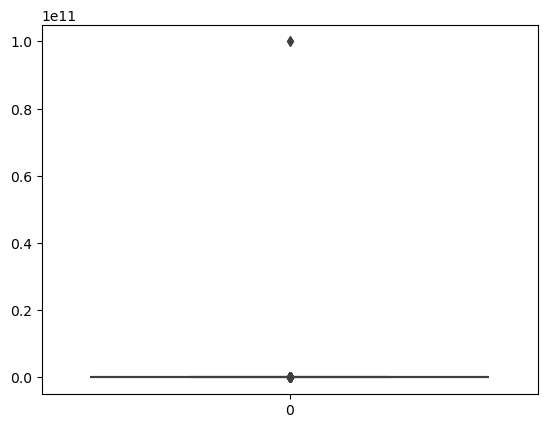

In [15]:
# Create a boxplot from survey.csv data against Age column.

sns.boxplot(df['Age'])

From this we can clearly see that 'Age' column has many outliers.

<Axes: >

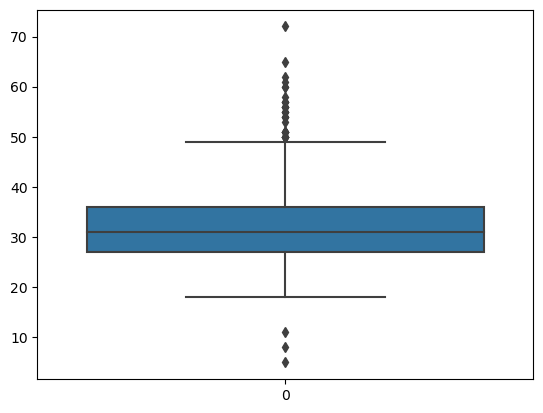

In [20]:
# Removing outliers
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True) 

sns.boxplot(df['Age'])

# This shows us that the median age is around 30 which we have to consider for analysis.

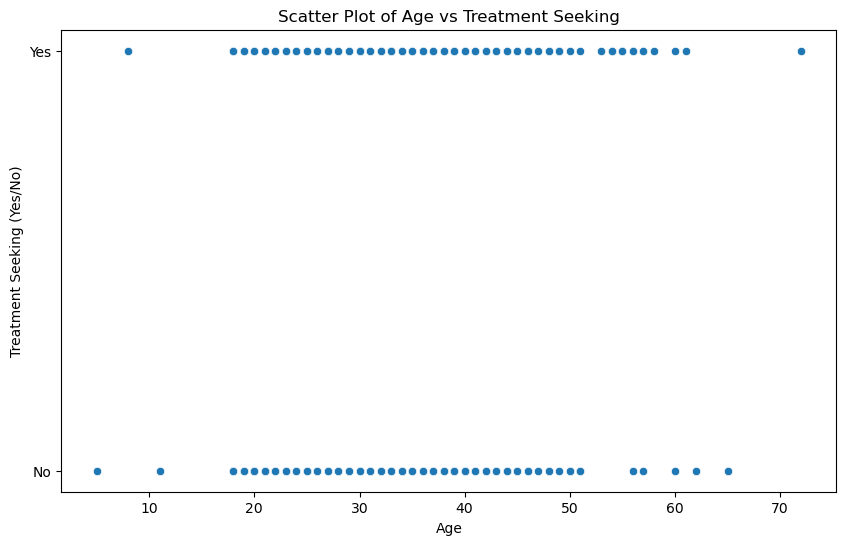

In [21]:
# create a bivariate plot using Age and tretement column from survey.csv dataset
# Selecting relevant columns
relevant_columns = ['Age', 'treatment']
subset_data = df[relevant_columns]

# Removing any rows with missing values in selected columns
subset_data = subset_data.dropna()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='treatment', data=subset_data)
plt.title('Scatter Plot of Age vs Treatment Seeking')
plt.xlabel('Age')
plt.ylabel('Treatment Seeking (Yes/No)')
plt.show()

# This code creates a scatter plot with age on the x-axis and treatment seeking on the y-axis.
# Each point in the plot represents a respondent's age and whether they sought treatment for a mental health condition.

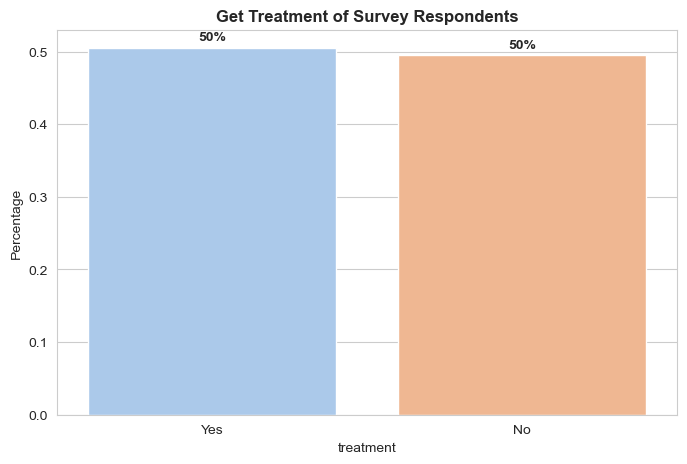

In [43]:
# Bar diagram to analyze how easy for employee sought treatment for a mental health condition
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=12, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='pastel')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Above plotting shows that the percentage of respondents who want to get treatment is exactly 50%. Workplaces that promote mental health and support people with mental disorders are more likely to have increased productivity, reduce absenteeism, and benefit from associated economic gains.

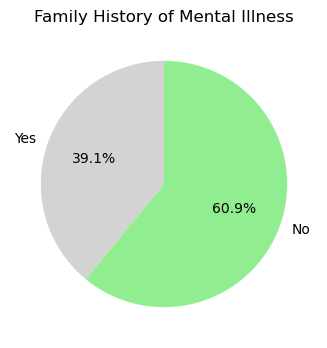

In [12]:
# Pie diagram to analyze family history of mental illness influences employees current mental health
yes = len(df[df['family_history'] == 'Yes'])
no = len(df[df['family_history'] == 'No'])

count = [yes, no]
labels = ['Yes', 'No']
colors = ['lightgrey', 'lightgreen']

# Customizing the pie chart
plt.figure(figsize=(8,4))
explode = (0, 1, 1)  # Only the second slice will explode
pc = plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Family History of Mental Illness');

From the above plot, we can see that most respondents do not know whether they are even allowed to take leave for a mental health issue, and there are also quite a number who find it hard to do so, which may be due to the social stigma surrounding mental issues.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


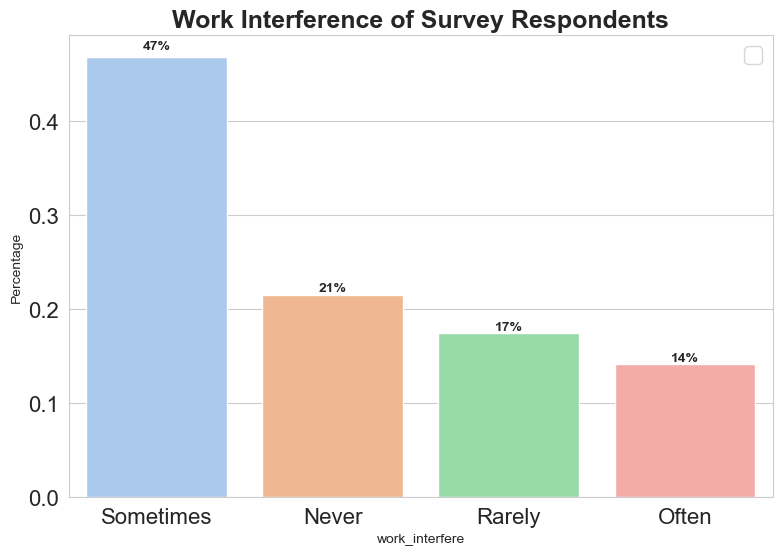

In [44]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='pastel')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

On seeing the graph we can conclude that around 47% of people say that sometimes work interefers with their mental health. Now 'Sometimes' is a really vague response to a question, and more often than not these are the people who actually face a condition but are too shy/reluctant to choose the extreme category.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


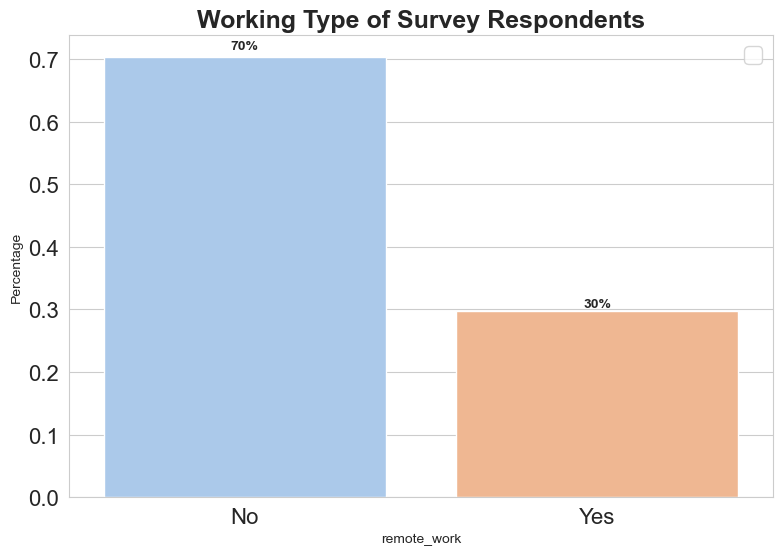

In [45]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='pastel')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


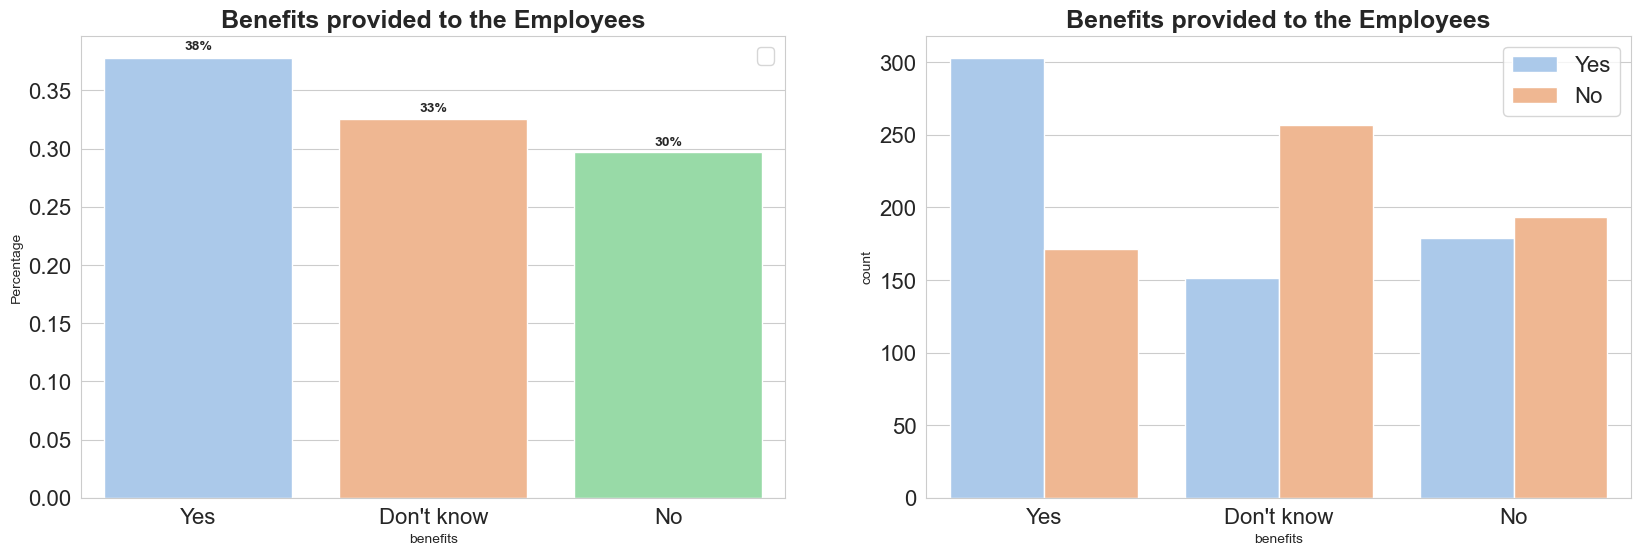

In [46]:
# Bar plot of benefits provided to the employees
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='pastel')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['benefits'], data = eda_percentage,  hue = df['treatment'], palette='pastel')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit. Coming to the second graph, we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help. Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.

coworkers
Some of them    772
No              258
Yes             224
Name: count, dtype: int64

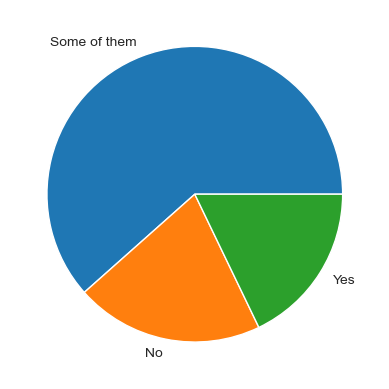

In [39]:
#pie plot tow show the willingness to discuss a mental health issue with coworkers
plt.pie(df['coworkers'].value_counts(),labels=df['coworkers'].unique())
df['coworkers'].value_counts()

So people prefer to share about their mental health with only some of their coworkers or sometimes dont even want to 
share sometimes because there may be coworkers who would just empathize and demotivate even more.

#### Conclusion :

From the above plotting we can conclude the below observations.

1. Cases show that more than 50% of people surveyed in countries like US,Australia and Canada undergo treatment for mental ailments.
2. People who are in the early 30's usually undergo treatment but there are extreme cases like 8 years and 72 years people recieving the same treatment.
3. It is interesting to find that people face mental trauma regardless of whether they are self employed or not.
4. People feel that sharing about their mental or physical health with employers would help them a bit but they are reluctant to share the same with their coworkers.They would prefer to share with only some of the coworkers.
5. The surveyed people agree that their mental health somewhat affects their productivity at work.
6. People feel that their employers somewhat easily sanction leave for mental health issues.The reason maybe that the employer does not want to take any risk of overloading the patient with work.
7. People dont know whether the employer considers mental health issues as seriously as the physical ones.The ambiguity still remains about people's reaction towards mental health.

#### References :

1. Kagggle : For source dataset.
2. matplotlib.org : For python plot basics understanding.